In [18]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 120

# 中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 读取原始抖音数据
csv_files = sorted(glob.glob('../data/psi_douyin_*.csv'))
if not csv_files:
    raise FileNotFoundError('未找到 ../data/psi_douyin_*.csv')

dfs = []
for file_path in csv_files:
    temp_df = pd.read_csv(file_path)
    temp_df['source_file'] = os.path.basename(file_path)
    dfs.append(temp_df)

df = pd.concat(dfs, ignore_index=True)
df['time'] = pd.to_datetime(df['ts'], unit='ms')

# 过滤 idle phase
df = df[df['phase'] != 'idle'].copy()

# 可选：只看某一个源文件（默认 None 表示看全部）
target_file = 'psi_douyin_20260301_205453.csv'  # 例如: 'psi_douyin_20260228_211328.csv'
if target_file is not None:
    plot_df = df[df['source_file'] == target_file].copy()
else:
    plot_df = df.copy()

plot_df = plot_df.sort_values('time').reset_index(drop=True)
plot_df['t_rel_s'] = (plot_df['ts'] - plot_df['ts'].iloc[0]) / 1000.0

print(f'总文件数: {len(csv_files)}')
print(f'过滤 idle 后样本数: {len(df)}')
print(f'当前用于绘图样本数: {len(plot_df)}')

NameError: name 'glob' is not defined

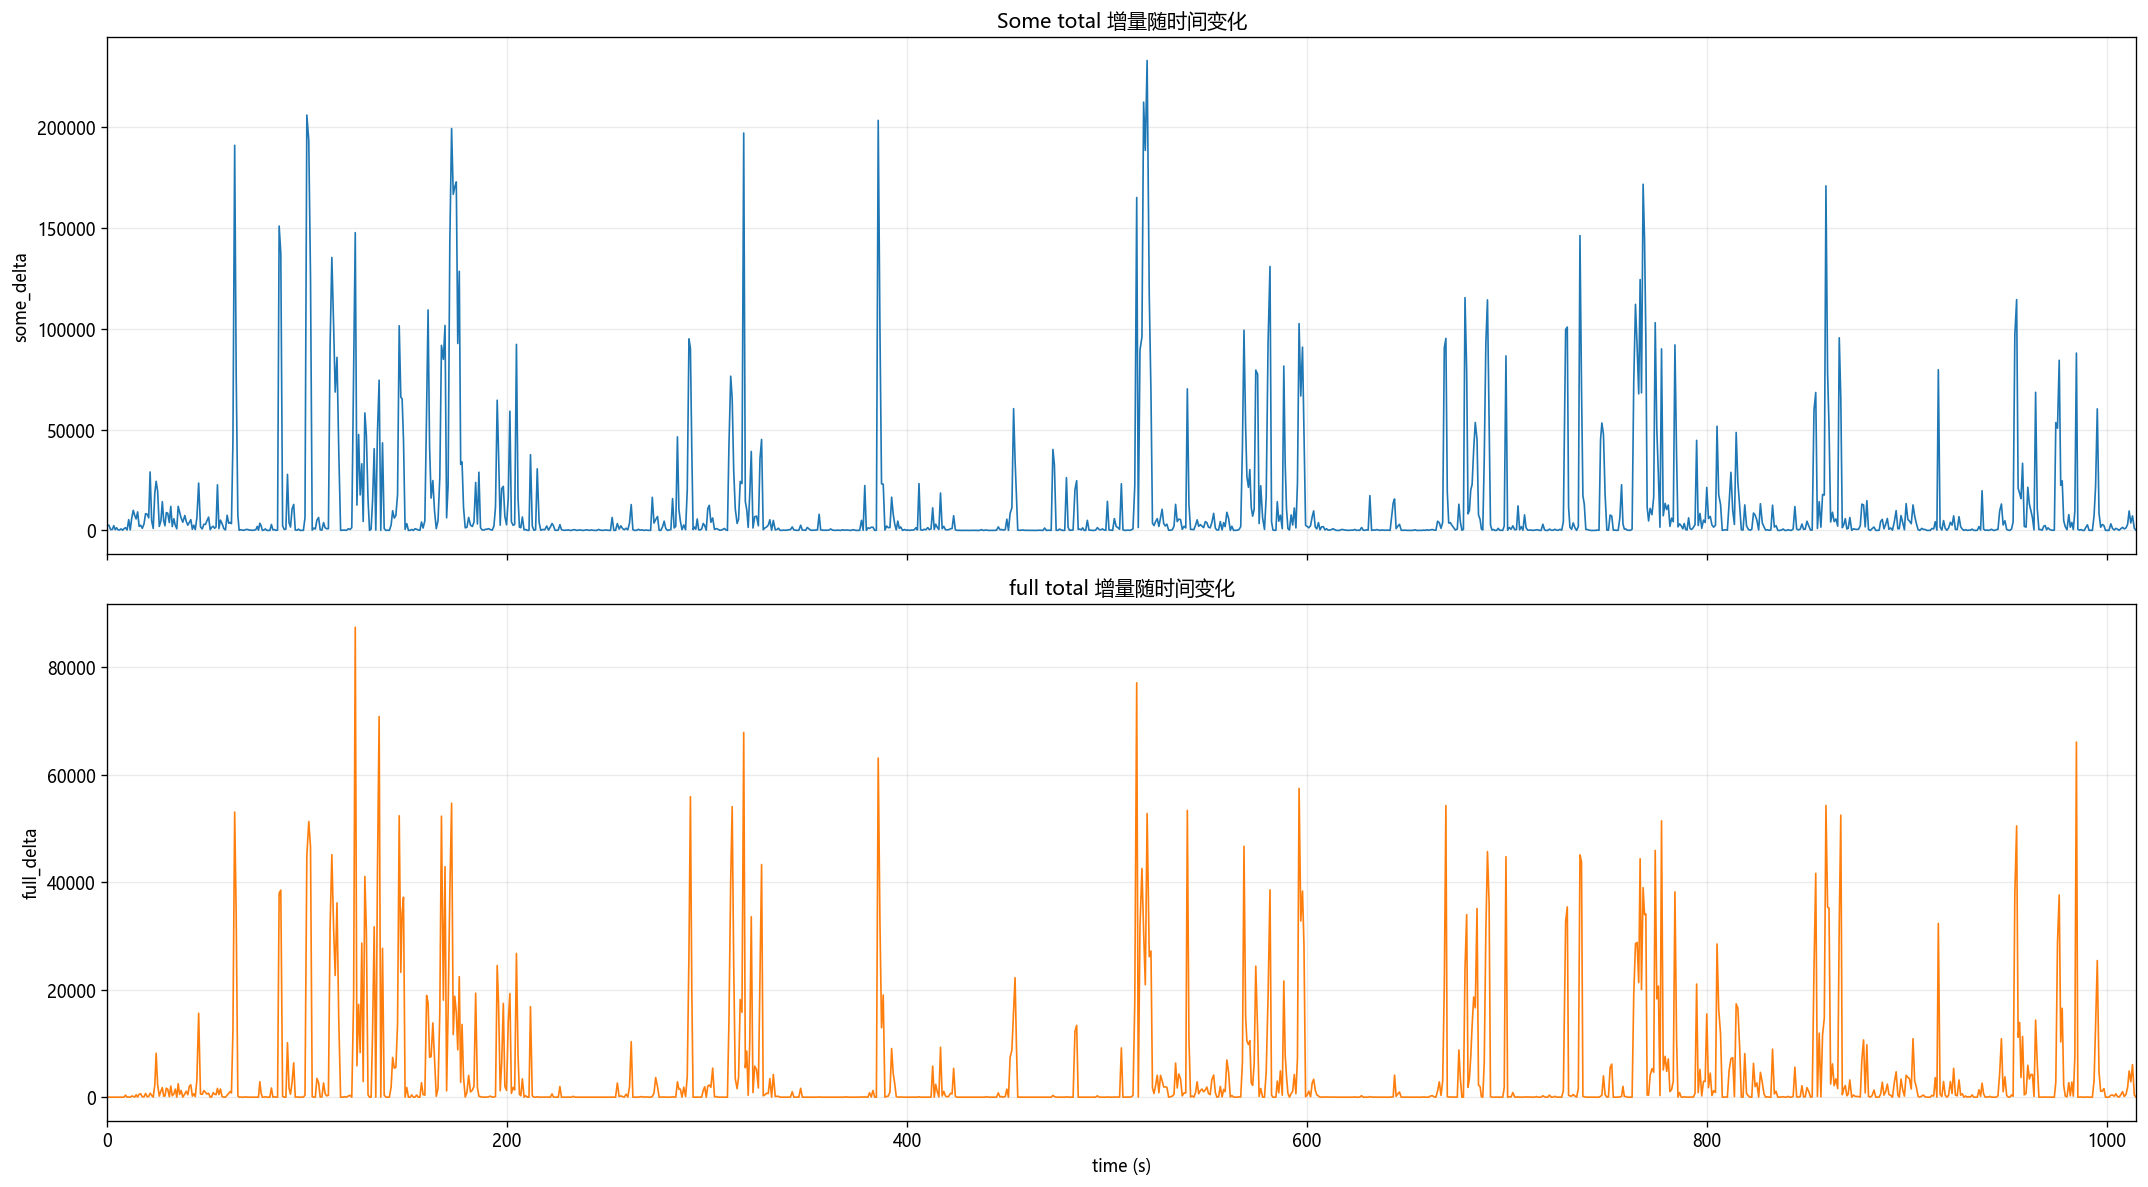

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)
ax_some, ax_full = axes

# 仅绘制时间序列曲线（横轴：相对秒）
ax_some.plot(plot_df['t_rel_s'], plot_df['some_delta'], color='tab:blue', linewidth=1.0)
ax_full.plot(plot_df['t_rel_s'], plot_df['full_delta'], color='tab:orange', linewidth=1.0)

# 去掉左右留白
ax_some.margins(x=0)
ax_full.margins(x=0)
ax_full.set_xlim(plot_df['t_rel_s'].min(), plot_df['t_rel_s'].max())

ax_some.set_title('Some total 增量随时间变化')
ax_some.set_ylabel('some_delta')
ax_some.grid(alpha=0.25)

ax_full.set_title('full total 增量随时间变化')
ax_full.set_ylabel('full_delta')
ax_full.set_xlabel('time (s)')
ax_full.grid(alpha=0.25)

plt.tight_layout()
plt.show()